In [1]:
import numpy as np
import scipy as sc
import pandas as pd

from IPython.display import display, Math, Latex

# Beispielprojekt: Analyse und Optimierung eines Bestellprozesses
## Problemstellung:
<font size="5">
Ein fiktives E-Commerce-Unternehmen möchte den Prozess seiner Bestellabwicklung optimieren, da die Bearbeitungszeiten für Bestellungen zu lang sind.
Ziel des Projekts ist es, durch Analyse der Daten Engpässe zu erkennen und mögliche Optimierungen vorzuschlagen.






## Daten:
### Die Daten enthalten folgende Informationen zu jeder Bestellung:
<font size="5">
    
- Bestellnummer (ID)
- Bestellzeitpunkt
- Zeitpunkt der Bearbeitung
- Zeitpunkt des Versands
- Bearbeitungsdauer (in Stunden)
- Versanddauer (in Stunden)
- Produktkategorie
- Bestellwert
- Beispielhafte Datenstruktur (CSV)

# Schritte des Projekts
<font size="5">
1.)
Datenaufbereitung und -bereinigung

In [2]:
# Lade die Bestelldaten ein, bereinige die Daten (z. B. fehlende Werte) und berechne die Bearbeitungs- und Versandzeiten für jede Bestellung.

# CSV-Daten laden
df = pd.read_csv("bestellungen.csv")


# Konvertiere Datumsfelder in Datetime-Objekte
df['Bestellzeitpunkt'] = pd.to_datetime(df['Bestellzeitpunkt'])
df['Bearbeitungszeitpunkt'] = pd.to_datetime(df['Bearbeitungszeitpunkt'])
df['Versandzeitpunkt'] = pd.to_datetime(df['Versandzeitpunkt'])

# Bearbeitungs- und Versanddauer berechnen
df['Bearbeitungsdauer'] = (df['Bearbeitungszeitpunkt'] - df['Bestellzeitpunkt']).dt.total_seconds() / 3600
df['Versanddauer'] = (df['Versandzeitpunkt'] - df['Bearbeitungszeitpunkt']).dt.total_seconds() / 3600

# Zeige Daten 
df


,Bestellnummer,Bestellzeitpunkt,Bearbeitungszeitpunkt,Versandzeitpunkt,Produktkategorie,Bestellwert,Bearbeitungsdauer,Versanddauer
0,1001,2023-09-01 08:30:00,2023-09-01 10:30:00,2023-09-02 08:00:00,Elektronik,250,2.00,21.50
1,1002,2023-09-01 09:00:00,2023-09-01 12:00:00,2023-09-02 09:00:00,Kleidung,80,3.00,21.00
2,1003,2023-09-01 10:00:00,2023-09-01 11:30:00,2023-09-02 10:00:00,Bücher,30,1.50,22.50
3,1004,2023-09-01 11:15:00,2023-09-01 12:45:00,2023-09-02 11:30:00,Haus & Garten,120,1.50,22.75
4,1005,2023-09-01 12:00:00,2023-09-01 14:00:00,2023-09-02 13:00:00,Elektronik,350,2.00,23.00
5,1006,2023-09-01 13:30:00,2023-09-01 15:00:00,2023-09-02 14:00:00,Schuhe,70,1.50,23.00
6,1007,2023-09-01 14:45:00,2023-09-01 16:30:00,2023-09-02 15:30:00,Spielzeug,60,1.75,23.00
7,1008,2023-09-01 15:30:00,2023-09-01 17:00:00,2023-09-02 16:00:00,Sport,150,1.50,23.00


<font size="5">
2.) Datenanalyse

In [3]:
# Durchschnittliche Bearbeitungs- und Versandzeit berechnen
durchschnitt_bearbeitung = df['Bearbeitungsdauer'].mean()
durchschnitt_versand = df['Versanddauer'].mean()

print(f"Durchschnittliche Bearbeitungszeit: {durchschnitt_bearbeitung:.2f} Stunden")
print(f"Durchschnittliche Versandzeit: {durchschnitt_versand:.2f} Stunden")


Durchschnittliche Bearbeitungszeit: 1.84 Stunden
Durchschnittliche Versandzeit: 22.47 Stunden


<font size="5">
3.) Visualisierung

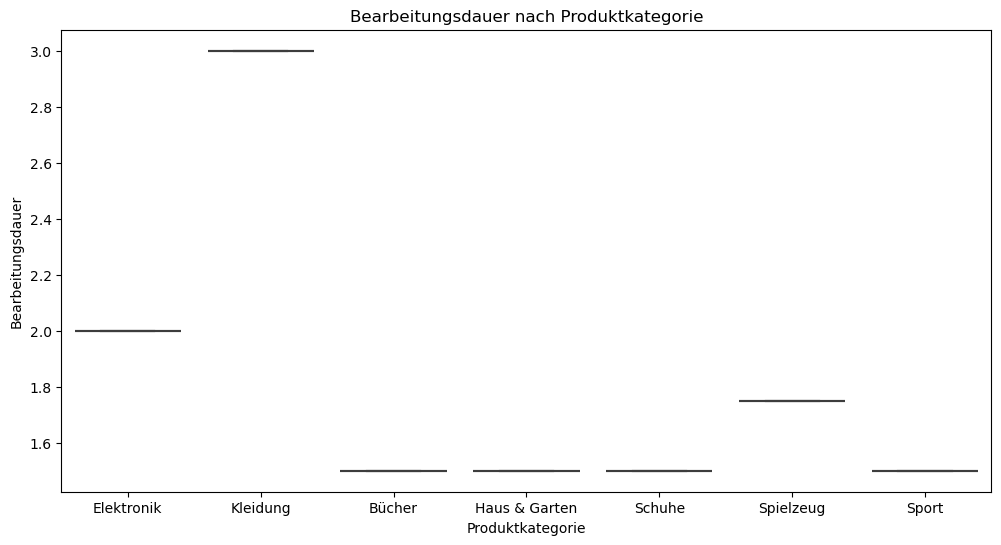

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Boxplot der Bearbeitungsdauer nach Produktkategorie
sns.boxplot(x='Produktkategorie', y='Bearbeitungsdauer', data=df)
plt.title("Bearbeitungsdauer nach Produktkategorie")
plt.show()


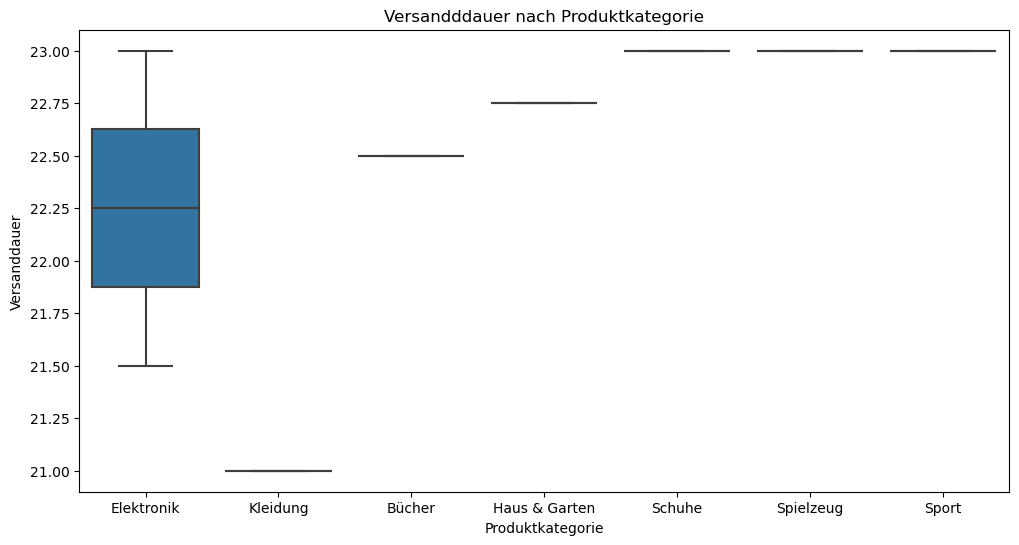

In [5]:
# Boxplot der Bearbeitungsdauer nach Produktkategorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='Produktkategorie', y='Versanddauer', data=df)
plt.title("Versandddauer nach Produktkategorie")
plt.show()



# Beobachtung:
<font size="5">
Die Bearbeitungsdauer der Produktkategorie Kleidung, sowie die Versanddauer der Kategorien Sport, Spielzeug, Schuhe 
und gegebenenfalls auch Haus & Garten fallen zu hoch aus und haben dementsprechend verbesserungspotential.
Mögliche Ursachen für das Zustandekommen der Verzögerungen müssen auf den Grund gegangen werden:

### Erklärung:

<font size="5">
Die Produktkategorien Schuhe, Spielzeug und Sport sind zu den Uhrzeiten 13:30 Uhr bis 15:30 Uhr. 
Aus Firmeninternen Daten geht hervor, dass zu diesen "Stoßzeiten" vermehrt Produkte bestellt werden.
Möglicherweise, hängen hohe Versandzeiten mit Bestellungen bei Stoßzeiten zusammen. Um eine einwandfreie Erklärung zu geben,
muss geklärt werden ob es Produktspezifische Verzögerungen gibt und inwiefern diese sich quantifizieren lassen.

### Optimierung:
<font size="5">
- Erhöhung der Personalressourcen zu Stoßzeiten
- Automatisierung von Standardprozessen für Produktkategorien Sport,Spielzeug, Schuhe etc.

### Fazit:
<font size="5">
Dieses Beispielprojekt kann Grundlage für einen reale Bestellsprozessoptimierung sein.
Es wurde dargelegt wie mittles Python Daten analysiert und potenzielle Engpässe identifiziert werden können.





